In [20]:
import SpectralSynthesis as ss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter
from matplotlib.offsetbox import AnchoredText
from scipy.stats import lognorm, linregress

In [21]:
H_list = [1,0.5,0]
S_list = [0.1,0.5,2.0]
SEED = 42
N = 1000
E=2

c:\Github\thesis-images\SpectralSynthesis.py:61: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\3198465967.py:28: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cont = ax[i,j].contour(gaussian_filter(X, sigma), levels = 2, cmap='magma', linewidth = 1)
c:\Github\thesis-images\SpectralSynthesis.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


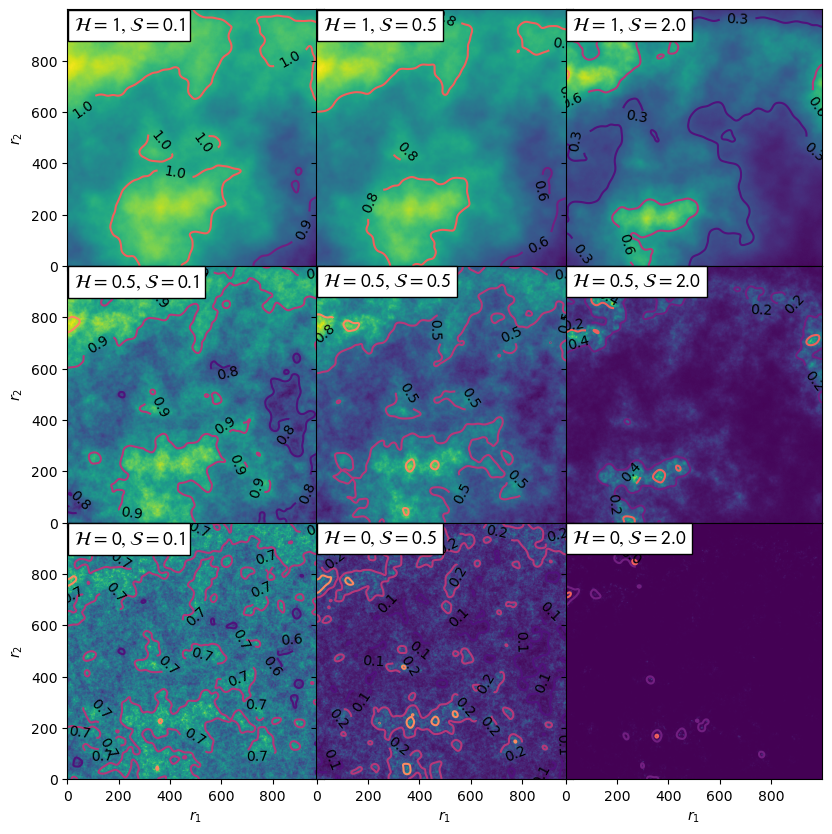

In [22]:
props = dict(facecolor='white', alpha=1)
sigma = 10

f,ax = plt.subplots(3,3, figsize = (10,10), sharex=True, sharey=True)

X_list = []
s_list = []
loc_list = []
scale_list = []
ps_list = []



for i, H in enumerate(H_list):
    for j, S in enumerate(S_list):
        X = ss.fBm(N=N, E=E, H=H, sigma=S, exp=True, centred = True, seed=SEED, periodic = False)

        noise_fraction = 0.05*np.std(X.flatten())

        noise_field = ss.fBm(N=N, E=E, H=-1, exp=False)*noise_fraction

        X = X+noise_field

        X /= np.max(X.flatten())
        img = ax[i,j].imshow(X, origin='lower')
        ax[i,j].text(0.025, 0.977, fr'$\cal H={H}, \cal S={S}$', transform=ax[i,j].transAxes, fontsize=14,
            verticalalignment='top', bbox=props, zorder=100)
        cont = ax[i,j].contour(gaussian_filter(X, sigma), levels = 2, cmap='magma', linewidth = 1)

        ax[i,j].clabel(cont, fmt='%1.1f', colors = 'k', fontsize=10)

        s, loc, scale = lognorm.fit(X.flatten())     

        PS = np.fft.fftn(X)
        abs_ps = np.log10(np.abs(np.fft.fftshift(PS)))   
        
        ps_list.append(abs_ps)
        s_list.append(s)
        loc_list.append(loc)
        scale_list.append(scale)
        X_list.append(X)
        ax[i,j].set_xlabel(r'$r_1$') 

    ax[i,0].set_ylabel(r'$r_2$')

f.subplots_adjust(wspace=-0.1, hspace=0)

#plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DxfBm-noisy.png', bbox_inches = 'tight')
plt.show()

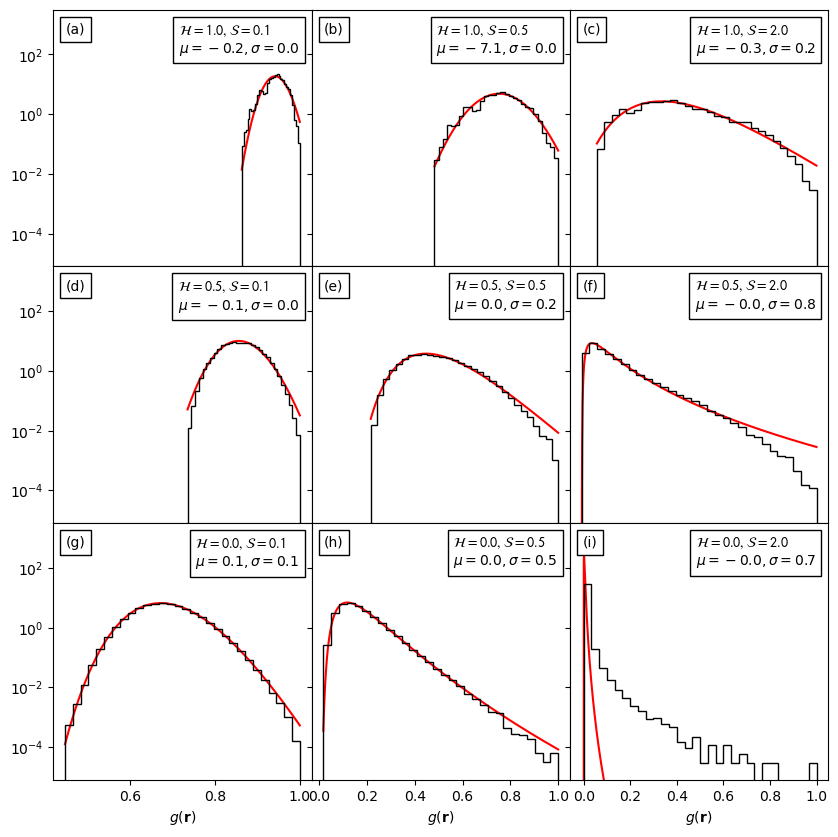

In [23]:
props = dict(facecolor='white', alpha=0.4)
sigma = 10

f,ax = plt.subplots(3,3, figsize = (10,10), sharex='col', sharey='row')

c=0

for i, H in enumerate(H_list):
    for j, S in enumerate(S_list):
        
        data = X_list[c].flatten()

        x = np.linspace(np.min(data), np.max(data), 1000)

        ax[i,j].plot(x, lognorm.pdf(x,s_list[c], loc_list[c], scale_list[c]), 'r-')

        ax[i,j].hist(data, bins=30, density=True, histtype='step', color='k')
        
        
        text = fr'$\cal H={H:.1f}, \cal S={S:.1f}$'+'\n'+fr'$\mu = {loc_list[c]:.1f},\sigma = {s_list[c]:.1f}$'

        anchored_text = AnchoredText(text, loc=1)
        ax[i,j].add_artist(anchored_text)

        label_text = AnchoredText(f'({chr(c+97)})', loc=2)
        ax[i,j].add_artist(label_text)

        ax[i,j].set_yscale('log')#, nonposy='clip')

        ax[i,j,].set_ylim(10**-(5.1), 10**3.5)
        ax[2,j].set_xlabel(r'$g(\mathbf{r})$')
        c +=1

f.subplots_adjust(wspace=0, hspace=0)

#plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DxfBm-dist-noisy.png', bbox_inches = 'tight')
plt.show()

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


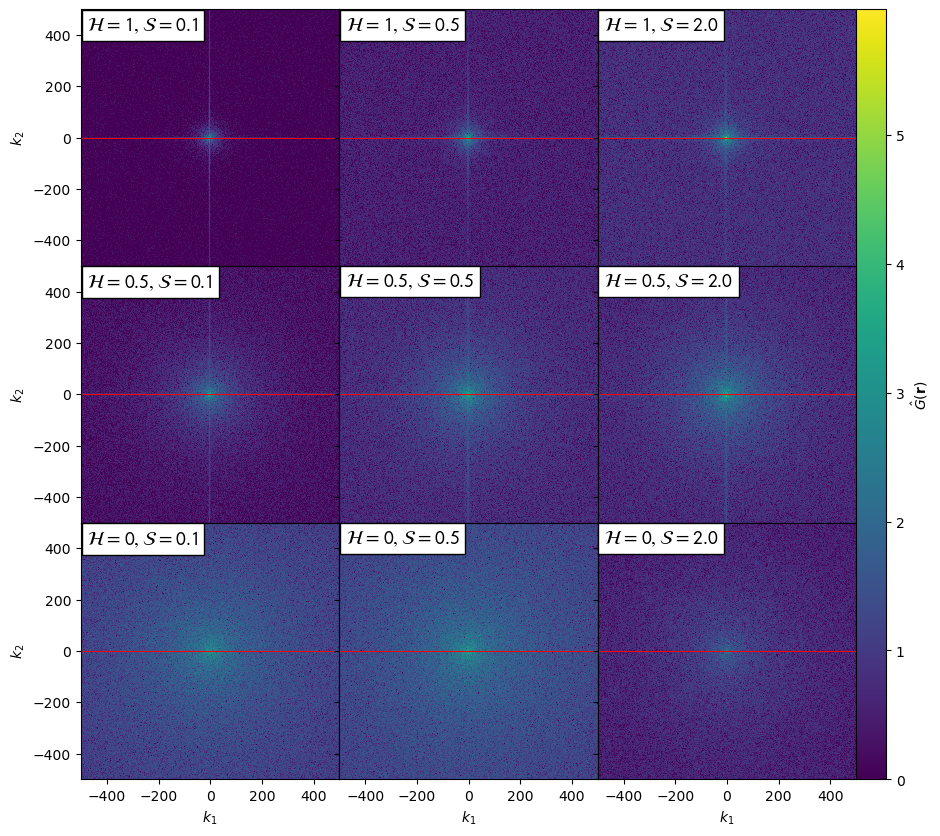

In [24]:
props = dict(facecolor='white', alpha=1)
sigma = 10

f,ax = plt.subplots(3,3, figsize = (10,10), sharex=True, sharey=True)

max = np.max([np.max(ps.flatten()) for ps in ps_list])

ps_slice_list = []

c=0

for i, H in enumerate(H_list):
    for j, S in enumerate(S_list):
        print(i,j)
        img = ax[i,j].pcolor(np.arange(-(N//2),N//2),np.arange(-N//2,N//2), ps_list[c], vmin=0, vmax = max)

        ax[i,j].text(0.025, 0.977, fr'$\cal H={H}, \cal S={S}$', transform=ax[i,j].transAxes, fontsize=14,
            verticalalignment='top', bbox=props, zorder=100)
 
        ax[i,j].set_xlabel(r'$k_1$')
        ax[i,j].axhline(0, c='r', linewidth=0.7)

        ps_slice_list.append(ps_list[c][N//2,:])

        c+=1

    ax[i,0].set_ylabel(r'$k_2$')

cbaxes = f.add_axes([0.9, 0.11, 0.03, 0.77])
cb = plt.colorbar(img,orientation="vertical", cax = cbaxes)
cb.set_label(r'$\hat{G}(\mathbf{r})$')

f.subplots_adjust(wspace=0, hspace=0)

#plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DxfBm-PS-noisy.png', bbox_inches = 'tight')
plt.show()

C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: invalid value encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: invalid value encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: invalid value encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: divide by zero encountered 

H_TRUE = 1, H_EST = 0.06176454650765528, S_TRUE = 0.1, S_EST = 0.022698003384360017, H_error = 0.9382354534923447, S_error = 0.7730199661563999
H_TRUE = 1, H_EST = 0.061931854752320215, S_TRUE = 0.5, S_EST = 0.1122324508131242, H_error = 0.9380681452476798, S_error = 0.7755350983737516
H_TRUE = 1, H_EST = 0.09583180775447175, S_TRUE = 2.0, S_EST = 0.4434418031155224, H_error = 0.9041681922455282, S_error = 0.7782790984422387
H_TRUE = 0.5, H_EST = 0.06951878751608165, S_TRUE = 0.1, S_EST = 0.0462790406439888, H_error = 0.8609624249678367, S_error = 0.537209593560112
H_TRUE = 0.5, H_EST = 0.05384590305303938, S_TRUE = 0.5, S_EST = 0.2307393415708138, H_error = 0.8923081938939212, S_error = 0.5385213168583725


C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: invalid value encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:27: RuntimeWarning: invalid value encountered in log
  S_est = np.nanstd(np.log(X_list[c]))
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: divide by zero encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: invalid value encountered in log10
  df['log10(k)'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  H_error = (H-H_est)/H
C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:14: RuntimeWarning: divide by zero enco

H_TRUE = 0.5, H_EST = 0.34057848684055725, S_TRUE = 2.0, S_EST = 0.9485355555256001, H_error = 0.3188430263188855, S_error = 0.5257322222372
H_TRUE = 0, H_EST = 0.007784298175832927, S_TRUE = 0.1, S_EST = 0.08991035125254748, H_error = -inf, S_error = 0.10089648747452523
H_TRUE = 0, H_EST = -0.10830114766120613, S_TRUE = 0.5, S_EST = 0.4505150800903027, H_error = inf, S_error = 0.09896983981939456
H_TRUE = 0, H_EST = -0.35332958552661076, S_TRUE = 2.0, S_EST = 1.4669958864210926, H_error = inf, S_error = 0.2665020567894537


C:\Users\Matt\AppData\Local\Temp\ipykernel_35684\765861683.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  H_error = (H-H_est)/H


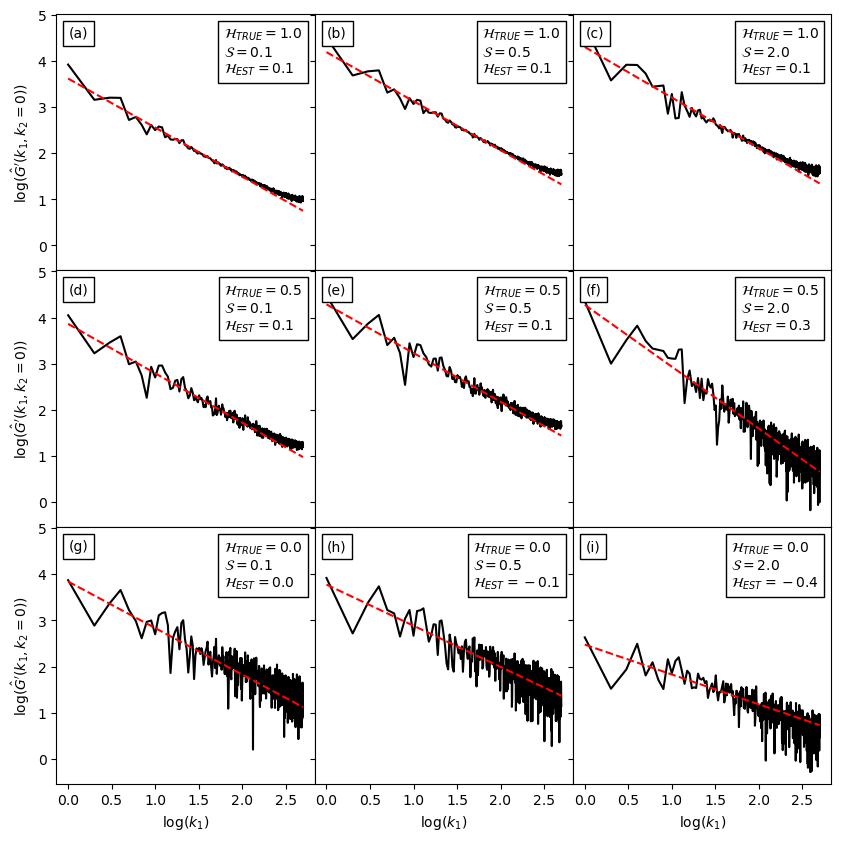

In [25]:
props = dict(facecolor='white', alpha=1)

f,ax = plt.subplots(3,3, figsize = (10,10), sharex=True, sharey=True)

k = np.arange(-N//2, N//2)

c=0

for i, H in enumerate(H_list):
    for j, S in enumerate(S_list):

        df = pd.DataFrame()

        df['log10(k)'] = np.log10(k)
        df['G'] = ps_slice_list[c] 

        ax[i,j].plot(df['log10(k)'], df['G'], c='k')

        df=df.replace([np.inf, -np.inf], np.nan).dropna()

        df_mod = df[df['log10(k)']<2]

        slope, intercept, r_value, p_value, std_err = linregress(df_mod['log10(k)'], df_mod['G'])

        beta = -2*slope
        H_est = (beta-2)/2
        S_est = np.nanstd(np.log(X_list[c]))

        H_error = (H-H_est)/H
        S_error = (S-S_est)/S

        ax[i,j].plot(df['log10(k)'], df['log10(k)']*slope + intercept, c='r', ls='--')

        text = fr'$\mathcal{{H}}_{{TRUE}}={H:.1f}$'+'\n'+fr'$\mathcal{{S}}={S:.1f}$'+'\n'+fr'$\mathcal{{H}}_{{EST}} = {H_est:.1f}$'

        anchored_text = AnchoredText(text, loc=1)
        ax[i,j].add_artist(anchored_text)

        label_text = AnchoredText(f'({chr(c+97)})', loc=2)
        ax[i,j].add_artist(label_text)

 
        ax[i,j].set_xlabel(r'$\log(k_1)$')

        print(f'H_TRUE = {H}, H_EST = {(beta-2)/2}, S_TRUE = {S}, S_EST = {S_est}, H_error = {H_error}, S_error = {S_error}')

        c+=1

    ax[i,0].set_ylabel(r'$\log(\hat{G}^\prime(k_1,k_2=0))$')

f.subplots_adjust(wspace=0, hspace=0)

#plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DxfBm-PS-sliced-noisy.png', bbox_inches = 'tight')
plt.show()